This project aims to study and investigate Employee Attrition using the statistical Survival Analysis method.
The dataset used in this project is IBM HR Analytics Employee Attrition & Performance available for download on Kaggle.

In [29]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import lifelines
from sklearn.preprocessing import LabelEncoder

In [30]:
df=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv', sep=',')

In [31]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [32]:
#exploring data

print(df.describe())

               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335            

In [33]:
#exploring categorical variables

res_categorical=[]
for c in df.columns:
    if df[c].dtype==object:
        res_categorical.append(c)
        print(df[c].value_counts())
        print(f"===================================")
        

No     1233
Yes     237
Name: Attrition, dtype: int64
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
Male      882
Female    588
Name: Gender, dtype: int64
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64
Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64
Y    1470
Name: Over18, dtype: int64
No     1054
Yes     416
Name: Over

In [34]:
#exploring numerical variables

res_numerical=[]
for c in df.columns:
    if df[c].dtype!=object:
        print(f"{c} : Minimum: {min((df[c].unique()))}, Maximum: {max((df[c].unique()))} ")
        res_numerical.append(c)
        print(f"===================================")

Age : Minimum: 18, Maximum: 60 
DailyRate : Minimum: 102, Maximum: 1499 
DistanceFromHome : Minimum: 1, Maximum: 29 
Education : Minimum: 1, Maximum: 5 
EmployeeCount : Minimum: 1, Maximum: 1 
EmployeeNumber : Minimum: 1, Maximum: 2068 
EnvironmentSatisfaction : Minimum: 1, Maximum: 4 
HourlyRate : Minimum: 30, Maximum: 100 
JobInvolvement : Minimum: 1, Maximum: 4 
JobLevel : Minimum: 1, Maximum: 5 
JobSatisfaction : Minimum: 1, Maximum: 4 
MonthlyIncome : Minimum: 1009, Maximum: 19999 
MonthlyRate : Minimum: 2094, Maximum: 26999 
NumCompaniesWorked : Minimum: 0, Maximum: 9 
PercentSalaryHike : Minimum: 11, Maximum: 25 
PerformanceRating : Minimum: 3, Maximum: 4 
RelationshipSatisfaction : Minimum: 1, Maximum: 4 
StandardHours : Minimum: 80, Maximum: 80 
StockOptionLevel : Minimum: 0, Maximum: 3 
TotalWorkingYears : Minimum: 0, Maximum: 40 
TrainingTimesLastYear : Minimum: 0, Maximum: 6 
WorkLifeBalance : Minimum: 1, Maximum: 4 
YearsAtCompany : Minimum: 0, Maximum: 40 
YearsInCurrentR

In [35]:
#Converting Attrition variable into binary variable

encoder=LabelEncoder()
df['Attrition']=encoder.fit_transform(df['Attrition'])

print (df['Attrition'][:10])

0    1
1    0
2    1
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: Attrition, dtype: int32


In [36]:
#In this project I use the non-parametric Kaplan-Meier Estimator to estimate the survival function.

from lifelines import KaplanMeierFitter

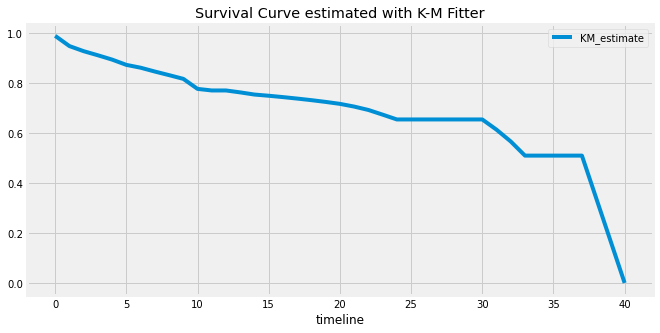

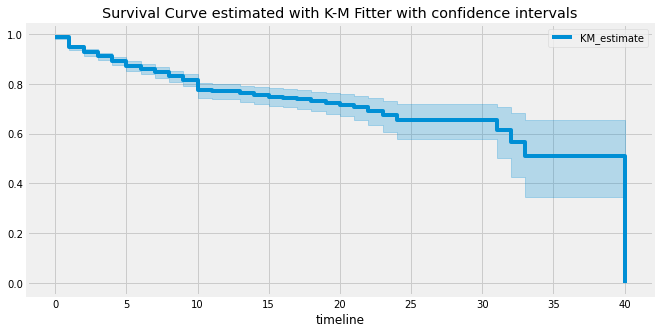

In [42]:
kmf = KaplanMeierFitter()
kmf.fit(durations=df['YearsAtCompany'], event_observed=df['Attrition'])

kmf.survival_function_.plot(figsize=(10,5))
plt.title('Survival Curve estimated with K-M Fitter')
plt.show()

kmf.plot_survival_function(figsize=(10,5))
plt.title('Survival Curve estimated with K-M Fitter with confidence intervals')
plt.show()

In [43]:
kmf.survival_function_

,KM_estimate
timeline,
0.0,0.989116
1.0,0.948192
2.0,0.927792
3.0,0.911342
4.0,0.894026
5.0,0.872931
6.0,0.861611
7.0,0.846275
8.0,0.831850


In [ ]:
#In this part, I will study the survival function for different groups of workers.

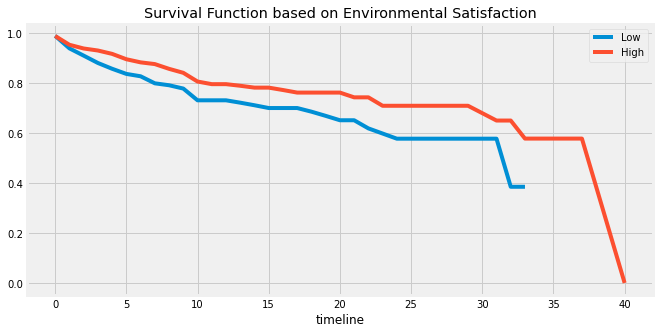

In [44]:
#Environmental Satisfaction

EnvironmentalLowSatisfaction = ((df['EnvironmentSatisfaction'] == 1) | (df['EnvironmentSatisfaction'] == 2))
EnvironmentalHighSatisfaction = ((df['EnvironmentSatisfaction'] == 3) | (df['EnvironmentSatisfaction'] == 4))

ax = plt.subplot()
kmf = KaplanMeierFitter()

kmf.fit(durations=df[EnvironmentalLowSatisfaction]['YearsAtCompany'], 
        event_observed=df[EnvironmentalLowSatisfaction]['Attrition'], 
        label='Low')
kmf.survival_function_.plot(figsize=(10,5), ax=ax)

kmf.fit(durations=df[EnvironmentalHighSatisfaction]['YearsAtCompany'], 
        event_observed=df[EnvironmentalHighSatisfaction]['Attrition'], 
        label='High')
kmf.survival_function_.plot(figsize=(10,5), ax=ax)
plt.title('Survival Function based on Environmental Satisfaction')
plt.show();



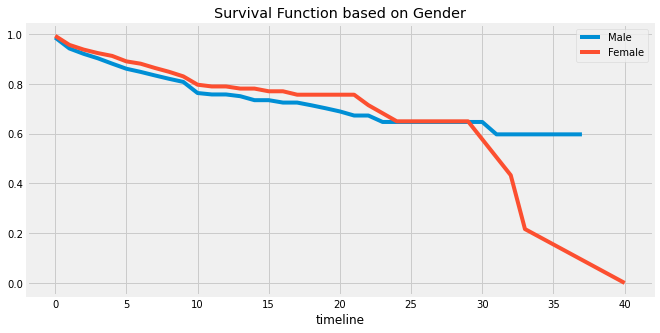

In [45]:
#Gender

female = (df['Gender'] == 'Female')
male = (df['Gender'] == 'Male')

kmf = KaplanMeierFitter()
ax = plt.subplot()

kmf.fit(durations=df[male]['YearsAtCompany'], event_observed=df[male]['Attrition'], label='Male')
kmf.survival_function_.plot(figsize=(10,5), ax=ax)
kmf.fit(durations=df[female]['YearsAtCompany'], event_observed=df[female]['Attrition'], label='Female')
kmf.survival_function_.plot(figsize=(10,5), ax=ax)
plt.title('Survival Function based on Gender')
plt.show();

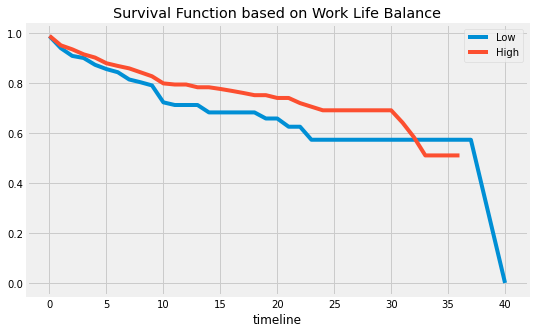

In [46]:
#Work-Life balance

worklifelow = ((df['WorkLifeBalance'] == 1) | (df['WorkLifeBalance'] == 2))
worklifehigh = ((df['WorkLifeBalance'] == 3) | (df['WorkLifeBalance'] == 4))

ax = plt.subplot()
kmf = KaplanMeierFitter()

kmf.fit(durations=df[worklifelow]['YearsAtCompany'], 
        event_observed=df[worklifelow]['Attrition'], 
        label='Low')
kmf.survival_function_.plot(figsize=(8,5), ax=ax)

kmf.fit(durations=df[worklifehigh]['YearsAtCompany'], 
        event_observed=df[worklifehigh]['Attrition'], 
        label='High')
kmf.survival_function_.plot(figsize=(8,5), ax=ax)
plt.title('Survival Function based on Work Life Balance')
plt.show();

In [47]:
from lifelines.statistics import logrank_test

output = logrank_test(durations_A = df[worklifelow]['YearsAtCompany'],
                      durations_B = df[worklifehigh]['YearsAtCompany'],
                      event_observed_A = df[worklifelow]['Attrition'],
                      event_observed_B = df[worklifehigh]['Attrition'])
output.print_summary


<bound method StatisticalResult.print_summary of <lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           4.40 0.04      4.80>

In [48]:
output = logrank_test(durations_A = df[male]['YearsAtCompany'],
                      durations_B = df[female]['YearsAtCompany'],
                      event_observed_A = df[male]['Attrition'],
                      event_observed_B = df[female]['Attrition'])
output.print_summary


<bound method StatisticalResult.print_summary of <lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           1.79 0.18      2.47>

In [49]:
#Preparing the dataframe for fitting
columns = ['Attrition',
                    'EnvironmentSatisfaction',
                    'JobInvolvement',
                    'JobLevel',
                    'JobSatisfaction',
                    'PercentSalaryHike',
                    'RelationshipSatisfaction',
                    'StockOptionLevel', 
                    'TrainingTimesLastYear', 
                    'YearsAtCompany',
                    ]
df = df[columns]

In [50]:
print(df)

      Attrition  EnvironmentSatisfaction  JobInvolvement  JobLevel  \
0             1                        2               3         2   
1             0                        3               2         2   
2             1                        4               2         1   
3             0                        4               3         1   
4             0                        1               3         1   
...         ...                      ...             ...       ...   
1465          0                        3               4         2   
1466          0                        4               2         3   
1467          0                        2               4         2   
1468          0                        4               2         2   
1469          0                        2               4         2   

      JobSatisfaction  PercentSalaryHike  RelationshipSatisfaction  \
0                   4                 11                         1   
1                  

In [51]:
from lifelines import CoxPHFitter 

coxph = CoxPHFitter()
coxph.fit(df, 
          duration_col='YearsAtCompany',
          event_col='Attrition')

<lifelines.CoxPHFitter: fitted with 1470 total observations, 1233 right-censored observations>

In [53]:
#Current employees
df_new = df.loc[df['Attrition'] == 0]

#Years at the company of current employees
df_new_obs = df_new['YearsAtCompany']

# Predict survival function for the employes still in the company
predictions = coxph.predict_survival_function(df_new, 
                              conditional_after=df_new_obs)
pd.DataFrame(predictions).head(10).iloc[:, :5]

,1,3,4,5,6
0.0,1.000000,1.000000,1.000000,1.000000,1.000000
1.0,0.986432,0.954723,0.960284,0.962204,0.988253
2.0,0.986432,0.832633,0.916395,0.921246,0.978083
3.0,0.967805,0.809508,0.861182,0.810189,0.966473
4.0,0.945323,0.809508,0.827520,0.789045,0.951264
5.0,0.932830,0.778306,0.780170,0.789045,0.941632
6.0,0.915764,0.741487,0.733267,0.760458,0.927576
7.0,0.896696,0.721424,0.683692,0.726633,0.913012
8.0,0.873145,0.694475,0.556009,0.708160,0.896843
9.0,0.842240,0.664989,0.532844,0.683295,0.850746


In [54]:
coxph.print_summary()

<lifelines.CoxPHFitter: fitted with 1470 total observations, 1233 right-censored observations>
             duration col = 'YearsAtCompany'
                event col = 'Attrition'
      baseline estimation = breslow
   number of observations = 1470
number of events observed = 237
   partial log-likelihood = -1449.16
         time fit was run = 2022-07-15 22:53:51 UTC

---
                           coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                        
EnvironmentSatisfaction   -0.24       0.79       0.06            -0.35            -0.12                 0.70                 0.89
JobInvolvement            -0.44       0.65       0.09            -0.61            -0.27                 0.55                 0.76
JobLevel                  -1.02       0.36       0.09            -1.20            -0.83                 0.30                 0.44
JobSatisfaction           -0.22       0.81       0.06            -0.33            -0.10                 0.72                 0.90
PercentSalaryHike         -0.01       0.99       0.02            -0.04             0.03                 0.96                 1.03
RelationshipSatisfaction  -0.08       0.92       0.06            -0.20             0.04                 0.82                 1.04
StockOptionLevel          -0.42       0.65       0.09            -0.60            -0.24                 0.55                 0.78
TrainingTimesLastYear     -0.17       0.85       0.05            -0.28            -0.06                 0.76                 0.94

                           cmp to      z      p   -log2(p)
covariate                                                 
EnvironmentSatisfaction      0.00  -4.00 <0.005      13.92
JobInvolvement               0.00  -5.08 <0.005      21.31
JobLevel                     0.00 -10.77 <0.005      87.49
JobSatisfaction              0.00  -3.77 <0.005      12.61
PercentSalaryHike            0.00  -0.44   0.66       0.60
RelationshipSatisfaction     0.00  -1.34   0.18       2.46
StockOptionLevel             0.00  -4.63 <0.005      18.04
TrainingTimesLastYear        0.00  -3.07 <0.005       8.84
---
Concordance = 0.79
Partial AIC = 2914.33
log-likelihood ratio test = 249.92 on 8 df
-log2(p) of ll-ratio test = 161.93

<AxesSubplot:xlabel='log(HR) (95% CI)'>

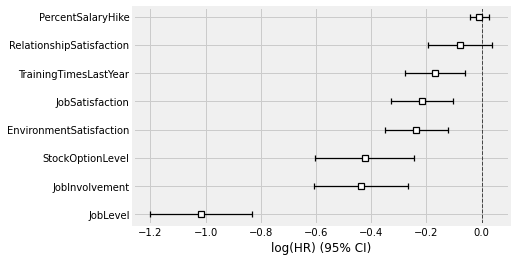

In [55]:
coxph.plot()

In [56]:
coxph.check_assumptions(df)

Proportional hazard assumption looks okay.


[]